# Práctica 2 Hardware Cuántico
**Autor: Jorge Vázquez Pérez**

In [14]:
#%pip install qiskit
#%pip install graphviz

import numpy as np
from qiskit import QuantumCircuit, transpile, execute
from qiskit_aer import Aer
from qiskit.visualization import plot_distribution, array_to_latex
from qiskit.quantum_info import Statevector
from qiskit.providers.fake_provider import FakeLimaV2
from qiskit.visualization import plot_gate_map
from matplotlib import pyplot as plt

from qiskit_ibm_provider import IBMProvider

IBMProvider.save_account('368ce8e3d58876f8744c71270f2727fd9883b04d75ad646fa5f7345d0b9dede6f06cdc12ebf7e0d0db8a2f0881369da230f432512437401e11ae29dd202b9561', overwrite=True)

%qiskit_version_table

UsageError: Line magic function `%qiskit_version_table` not found.


/home/jvazquez/miniconda3/envs/basic-quantum/lib/python3.9/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


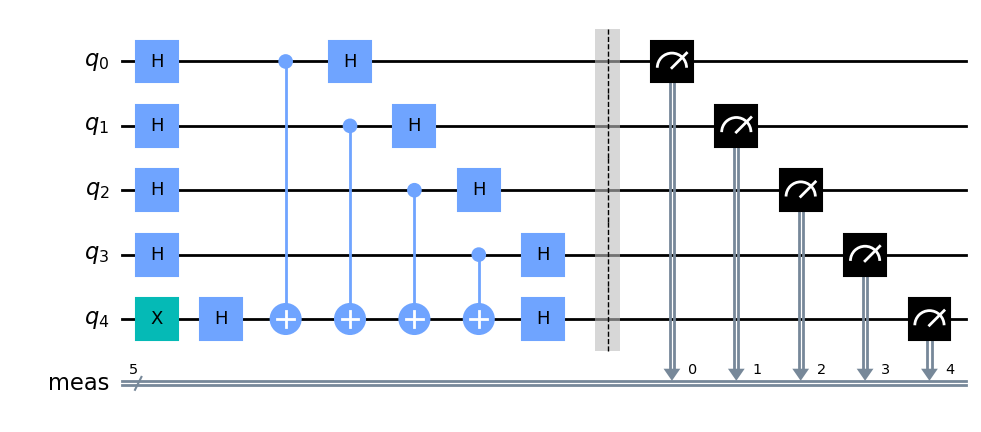

In [15]:
n = 5

# Create the bell state circuit
qc = QuantumCircuit(n)
qc.x(n-1)
qc.h(range(n))
for i in range(0, n-1):
    qc.cx(i, n-1) 
qc.h(range(n))
qc.measure_all()

qc.draw("mpl")

['id', 'rz', 'sx', 'x', 'cx', 'reset', 'measure', 'delay']
[[4, 3], [3, 4], [0, 1], [1, 0], [3, 1], [1, 3], [2, 1], [1, 2]]


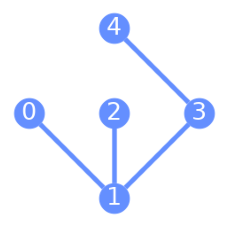

In [16]:
backend = FakeLimaV2()

print(backend.operation_names)
print(backend.coupling_map)
plot_gate_map(backend)

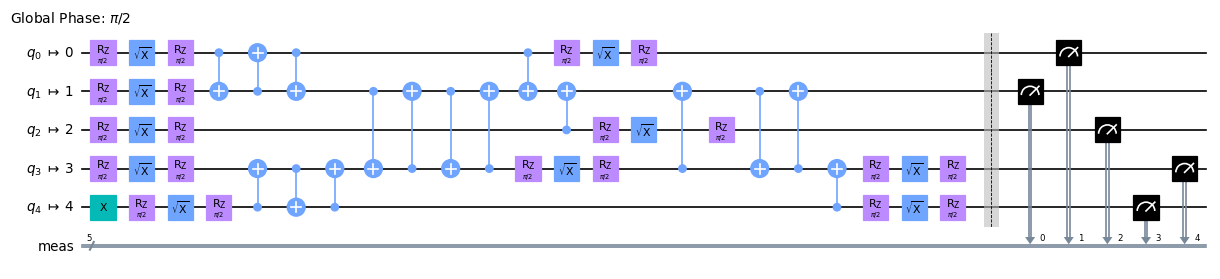

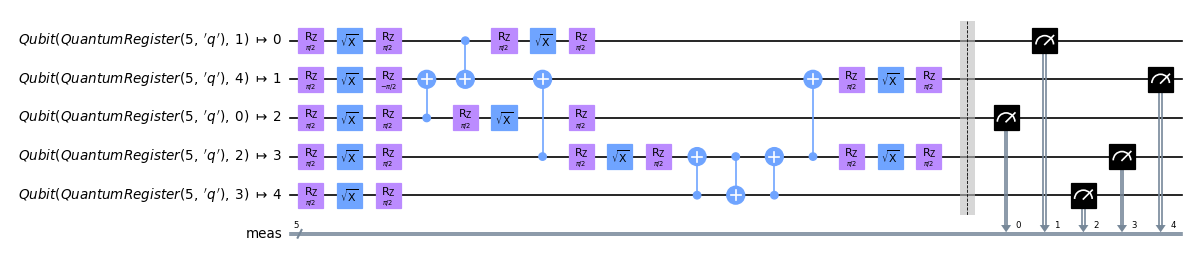

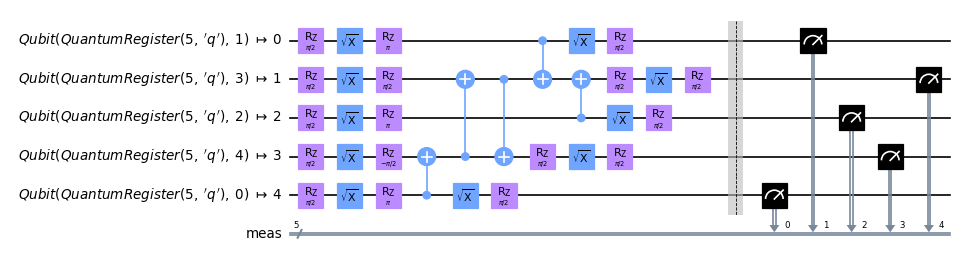

In [23]:
from time import time

times = {}

# Transpile the circuits
start = time()
tqc0 = transpile(qc, backend, optimization_level=0)
end = time()
times["tqc0"] = end - start

start = time()
tqc1 = transpile(qc, backend, optimization_level=1)
end = time()
times["tqc1"] = end - start

start = time()
tqc2 = transpile(qc, backend, optimization_level=2)
end = time()
times["tqc2"] = end - start

tqcs = [(tqc0, "tqc0"), (tqc1, "tqc1"), (tqc2, "tqc2")]

for i, (tqc, _) in enumerate(tqcs):
    display(tqc.draw("mpl", fold=30, scale=0.6))


In [21]:

print("OPTIMIZATION LEVELS INFO")
for i, (tqc, tqc_str) in enumerate(tqcs):
    print(f"\n------ Optimization level {i} info ------")
    print(f"Depth: {tqc.depth()}")
    print(f"Transpilation time: {times[tqc_str]}")
    print(f"Gate counts: {tqc.size()}")

OPTIMIZATION LEVELS INFO

------ Optimization level 0 info ------
Depth: 22
Transpilation time: 0.04045891761779785
Gate counts: 52

------ Optimization level 1 info ------
Depth: 15
Transpilation time: 0.026767730712890625
Gate counts: 42

------ Optimization level 2 info ------
Depth: 15
Transpilation time: 0.20457816123962402
Gate counts: 38


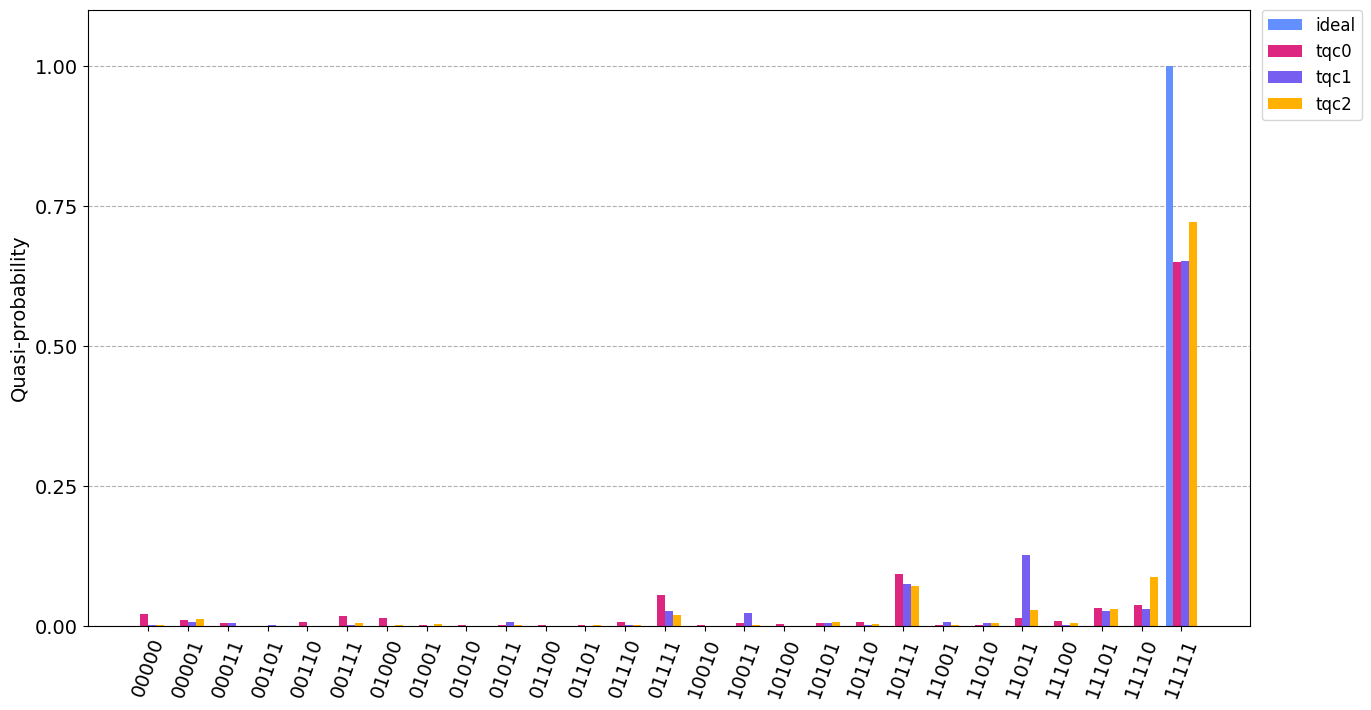

In [29]:
shots = 1000
counts = {}

counts["ideal"] = execute(qc, Aer.get_backend("qasm_simulator"), shots=shots).result().get_counts()

for i, (tqc, tqc_str) in enumerate(tqcs):
    counts[tqc_str] = execute(tqc, backend, shots=shots).result().get_counts()

plot_distribution([count for _, count in counts.items()], legend=[tqc_str for tqc_str, _ in counts.items()], bar_labels=False, figsize=(15, 8))

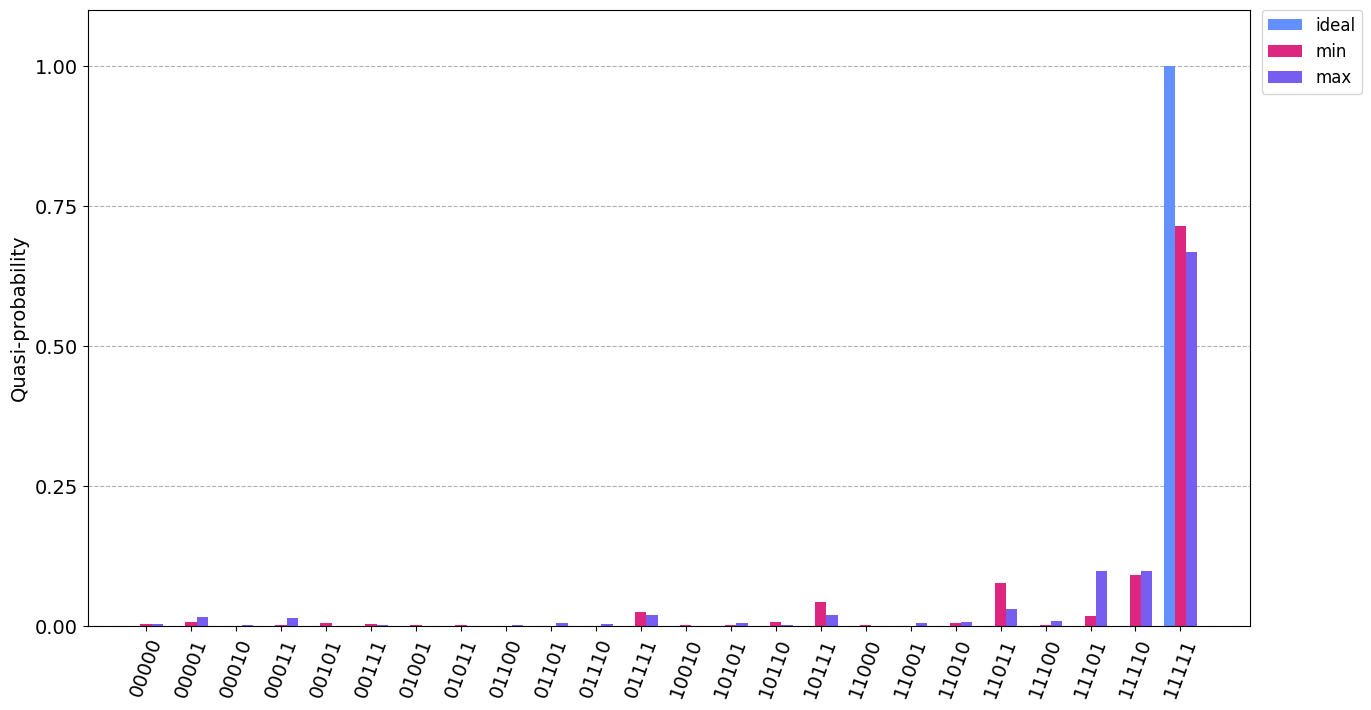

In [30]:
tranpilations = []

for _ in range(100):
    tqc = transpile(qc, backend, optimization_level=2)
    tranpilations.append(tqc)

    min_transpilation = min(tranpilations, key=lambda tqc: tqc.depth())
    max_transpilation = max(tranpilations, key=lambda tqc: tqc.depth())

counts = {"ideal": counts["ideal"]}
counts["min"] = execute(min_transpilation, backend, shots=shots).result().get_counts()
counts["max"] = execute(max_transpilation, backend, shots=shots).result().get_counts()

plot_distribution([count for _, count in counts.items()], legend=[tqc_str for tqc_str, _ in counts.items()], bar_labels=False, figsize=(15, 8))
